# Implementação de multi-layer perceptron

# Importações

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from random import randint

ModuleNotFoundError: No module named 'matplotlib'

# MNIST

## Carregando o dataset

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# MNIST c/ Conv. Net

## Configurando a rede neural

In [3]:
# Feature Learning Section
model_conv = tf.keras.models.Sequential()  # a basic feed-forward model
model_conv.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(tf.keras.layers.MaxPooling2D((2, 2))) # Pooling para reduzir a dimensionalidade de sem perder o perfil característico, as features, das images
model_conv.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_conv.add(tf.keras.layers.MaxPooling2D((2, 2))) 

2023-12-08 14:20:02.799974: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 14:20:02.835166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-08 14:20:02.835385: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

KeyboardInterrupt: 

![Classification](images/featureLearning.jpeg)


In [ ]:
# Class Identification Section
model_conv.add(tf.keras.layers.Flatten())
model_conv.add(tf.keras.layers.Dense(128, activation="relu"))  # a simple fully-connected layer, 128 units, relu activation
model_conv.add(tf.keras.layers.Dense(10))  # a simple fully-connected layer, 128 units, relu activation

![Classification](images/classification.jpeg)


In [ ]:
model_conv.summary()
model_conv.compile(optimizer='adam',  # Good default optimizer to start with
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## Treinando



In [ ]:
model_conv.fit(x_train, y_train, epochs=3)  # train the model

Epoch 1/3


2023-12-08 14:19:14.700984: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2023-12-08 14:19:16.741759: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 14:19:16.743803: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 14:19:16.743875: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:110] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-08 14:19:16.745184: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 14:19:16.745265: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptx

InternalError: Graph execution error:

Detected at node Adam/StatefulPartitionedCall_6 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/felipe/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/felipe/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/felipe/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/felipe/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_136060/3438726412.py", line 1, in <module>

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/felipe/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node Adam/StatefulPartitionedCall_6}}]] [Op:__inference_train_function_1114]

## Testando o resultado

In [ ]:
predict = model_conv.predict(x_test)

313/313 [==============================] - 1s 4ms/step


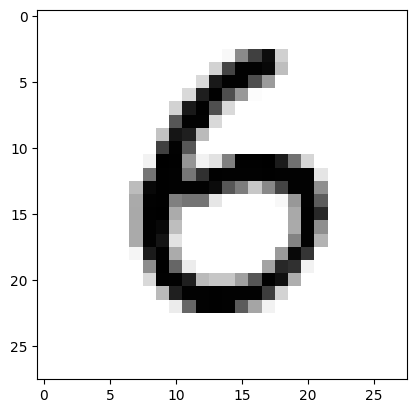

Predição:  6


In [ ]:
random_value = randint(0, len(predict))

plt.imshow(x_test[random_value],cmap=plt.cm.binary)
plt.show()


print('Predição: ', np.argmax(predict[random_value]))